# Análisis de datos sobre el Covid con 'pandas'

### Tomamos el enlace de la base de datos que contiene información acerca de la incidencia del Covid. Esta api nos servirá para posteriormente visualizarse gracias a la importación de la librería 'pandas'. Así, la api podrá ser fácilmente entendible para quien tiene delante esos datos

La URL https://api.covid19api.com/countries

### Instalamos la librería 'pandas' porque el paquete no se encuentra dentro de las librerías de las que dispone Jupyterhub

In [2]:
 !pip install pandas


### Primero importamos la librería para poder trabajar con ella y utilizar sus tablas de visualización de datos. A continuación, denominamos a pandas simplemente pd para que sea más fácil referenciar su nombre

In [3]:
import pandas as pd

### Asignamos un valor a la URL para que cuando escribamos "url", Python entienda que nos referimos exactamente al contenido de ese enlace que contiene la api

In [7]:
url = 'https://api.covid19api.com/countries'

### Llamamos al URL que contiene el archivo json con la función de pandas read_json y después analizamos con nano qué delimitadores tiene este archuivo en concreto. Así se puede leer correctamente

In [8]:
 df = pd.read_json(url)

### Comprobamos el contenido del dataframe y nos aseguramos de que podemos visualizar lo que previamente hemos indicado

In [9]:
df

,Country,Slug,ISO2
0,French Polynesia,french-polynesia,PF
1,Indonesia,indonesia,ID
2,Malta,malta,MT
3,Sao Tome and Principe,sao-tome-and-principe,ST
4,Haiti,haiti,HT
...,...,...,...
243,Myanmar,myanmar,MM
244,Turkey,turkey,TR
245,Western Sahara,western-sahara,EH
246,Pitcairn,pitcairn,PN


### Mediante las funciones head y tail podemos visualizar la parte superior e inferior de los datos de la tabla respectivamente

In [10]:
df.head()

,Country,Slug,ISO2
0,French Polynesia,french-polynesia,PF
1,Indonesia,indonesia,ID
2,Malta,malta,MT
3,Sao Tome and Principe,sao-tome-and-principe,ST
4,Haiti,haiti,HT


In [11]:
df.tail ()

,Country,Slug,ISO2
243,Myanmar,myanmar,MM
244,Turkey,turkey,TR
245,Western Sahara,western-sahara,EH
246,Pitcairn,pitcairn,PN
247,"Tanzania, United Republic of",tanzania,TZ


In [15]:
df['Country'][66]

SyntaxError: invalid character in identifier (<ipython-input-15-7102d5b2d490>, line 1)

### Ahora solamente buscamos los datos relativos a España, por lo que delimitamos dicha búsqueda: Reasignamos un valor a la url y marcamos que la dataframe que necesitamos tomar es la de España

In [16]:
url_es='https://api.covid19api.com/country/spain/status/confirmed/live'
df_es= pd.read_json(url_es)
df_es


,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-22 00:00:00+00:00
1,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-23 00:00:00+00:00
2,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-24 00:00:00+00:00
3,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-25 00:00:00+00:00
4,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
798,Spain,ES,,,,40.46,-3.75,11508309,confirmed,2022-03-30 00:00:00+00:00
799,Spain,ES,,,,40.46,-3.75,11508309,confirmed,2022-03-31 00:00:00+00:00
800,Spain,ES,,,,40.46,-3.75,11551574,confirmed,2022-04-01 00:00:00+00:00
801,Spain,ES,,,,40.46,-3.75,11551574,confirmed,2022-04-02 00:00:00+00:00


### Obtenemos el nombre de cada columna mediante la función 'columns'

In [17]:
df_es.columns


Index(['Country', 'CountryCode', 'Province', 'City', 'CityCode', 'Lat', 'Lon',
       'Cases', 'Status', 'Date'],
      dtype='object')

### Con la función info obtenemos  un resumen del dataframe, como en este caso el número total de columnas (vemos que son un total de 10) o la memoria usada

In [18]:
df_es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Country      803 non-null    object             
 1   CountryCode  803 non-null    object             
 2   Province     803 non-null    object             
 3   City         803 non-null    object             
 4   CityCode     803 non-null    object             
 5   Lat          803 non-null    float64            
 6   Lon          803 non-null    float64            
 7   Cases        803 non-null    int64              
 8   Status       803 non-null    object             
 9   Date         803 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 62.9+ KB


### Para obtener información sobre valores numéricos de una columna utilizamos la función describe

In [19]:
df_es.describe()

,Lat,Lon,Cases
count,8.030000e+02,803.00,8.030000e+02
mean,4.046000e+01,-3.75,3.242248e+06
std,7.109856e-15,0.00,3.109442e+06
min,4.046000e+01,-3.75,0.000000e+00
25%,4.046000e+01,-3.75,3.186710e+05
50%,4.046000e+01,-3.75,3.149012e+06
75%,4.046000e+01,-3.75,4.920388e+06
max,4.046000e+01,-3.75,1.155157e+07


### Con index establecemos columnas de longitud apropiada como índice del dataFrame.  El nuevo índice establecido puede reemplazar al índice existente 

In [26]:
df_es.set_index('Date')['Cases']


Date
2020-01-22 00:00:00+00:00           0
2020-01-23 00:00:00+00:00           0
2020-01-24 00:00:00+00:00           0
2020-01-25 00:00:00+00:00           0
2020-01-26 00:00:00+00:00           0
                               ...   
2022-03-30 00:00:00+00:00    11508309
2022-03-31 00:00:00+00:00    11508309
2022-04-01 00:00:00+00:00    11551574
2022-04-02 00:00:00+00:00    11551574
2022-04-03 00:00:00+00:00    11551574
Name: Cases, Length: 803, dtype: int64

<AxesSubplot:xlabel='Date'>

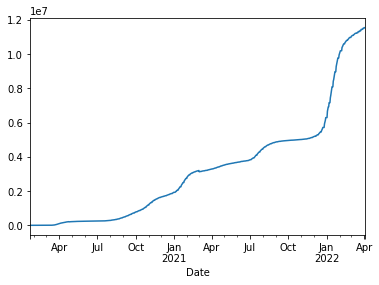

In [27]:
df_es.set_index('Date')['Cases'].plot()

In [28]:
df_es.set_index('Date')['Cases'].plot(title="Casos de Covid en España”)


SyntaxError: EOL while scanning string literal (<ipython-input-28-79c399932c08>, line 1)